In [1]:
from keras.models import Sequential
from keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

2022-11-18 21:58:06.755124: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df_processed = pd.read_csv("dataset/mp5/processed.csv", index_col=0)
df_similar = df_processed[df_processed['is_duplicate'] == 1]
df_non_similar = df_processed[df_processed['is_duplicate'] == 0]
df_similar = df_similar.sample(15000, random_state=123)
df_non_similar = df_non_similar.sample(15000, random_state=123)

df_processed = pd.concat([df_similar, df_non_similar])
y = df_processed['is_duplicate']
X = df_processed.drop('is_duplicate', axis = 1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [4]:
# make corpus from training set
q1_train = X_train['question1_processed'].astype(str)
q2_train = X_train['question2_processed'].astype(str)
question_corpus = q1_train + q2_train

In [5]:
# vectorize the top 25000 words
vectorizer = CountVectorizer(max_features=25000)

# fit the vectorizer on the training set
vectorizer.fit(question_corpus)

# transform train set
count_q1_train = vectorizer.transform(q1_train)
count_q2_train = vectorizer.transform(q2_train)
count_X_train = count_q1_train + count_q2_train

count_X_train = count_X_train.toarray()

# transform test set
count_q1_test = vectorizer.transform(X_test['question1_processed'].astype(str))
count_q2_test = vectorizer.transform(X_test['question2_processed'].astype(str))
count_X_test = count_q1_test + count_q2_test

count_X_test = count_X_test.toarray()

In [6]:
input_dim = count_X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-11-18 21:58:16.868038: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                163720    
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 163,797
Trainable params: 163,797
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(count_X_train, y_train,
                     epochs=10,
                     validation_data=(count_X_test, y_test),
                     batch_size=128)

2022-11-18 21:58:16.987209: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2750328000 exceeds 10% of free system memory.


Epoch 1/10
165/165 [==============================] - 2s 10ms/step - loss: 0.6467 - accuracy: 0.6426 - val_loss: 0.5871 - val_accuracy: 0.6948
Epoch 2/10
165/165 [==============================] - 1s 7ms/step - loss: 0.5253 - accuracy: 0.7495 - val_loss: 0.5807 - val_accuracy: 0.6944
Epoch 3/10
165/165 [==============================] - 1s 7ms/step - loss: 0.4377 - accuracy: 0.8063 - val_loss: 0.6081 - val_accuracy: 0.6890
Epoch 4/10
165/165 [==============================] - 1s 7ms/step - loss: 0.3680 - accuracy: 0.8462 - val_loss: 0.6498 - val_accuracy: 0.6930
Epoch 5/10
165/165 [==============================] - 1s 7ms/step - loss: 0.3139 - accuracy: 0.8713 - val_loss: 0.7038 - val_accuracy: 0.6850
Epoch 6/10
165/165 [==============================] - 1s 7ms/step - loss: 0.2693 - accuracy: 0.8912 - val_loss: 0.7568 - val_accuracy: 0.6857
Epoch 7/10
165/165 [==============================] - 1s 7ms/step - loss: 0.2311 - accuracy: 0.9077 - val_loss: 0.8290 - val_accuracy: 0.6814
Epoch

In [9]:
from keras.backend import clear_session
clear_session()

In [10]:
loss, accuracy = model.evaluate(count_X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(count_X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

2022-11-18 21:58:30.329860: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2750328000 exceeds 10% of free system memory.


Training Accuracy: 0.9623
Testing Accuracy:  0.6798


In [13]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

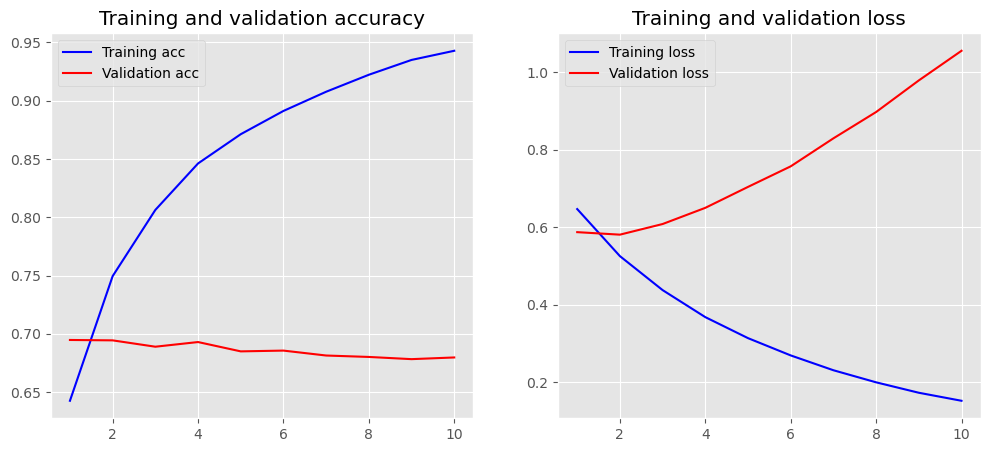

In [14]:
plot_history(history)